In [1]:
import requests

In [2]:
# Proxecto Covid-19 en narrativa.com

In [3]:
# Indica as URLs de documentación da API
# https://covid19tracking.narrativa.com/es/spain/api.html
# https://documenter.getpostman.com/view/10831675/SzYZ1eNY

In [4]:
# Nota: algunhas APIs constrúen os seus endpoints mediante datos que lles proporcionamos.
# Nestes casos é normal que non se pasen os parámetros dentro da solicitude (usando "param", por exemplo)
# senón que utilizamos algúns datos para construír a propia URL á que facer as consultas

In [5]:
# 1. Consultar número de infectados Covid-19 ata o día de hoxe en todo o mundo

In [6]:
from datetime import date, timedelta

hoxe = date.today().strftime('%Y-%m-%d')

In [7]:
url_base = 'https://api.covid19tracking.narrativa.com/api/'

In [8]:
data = hoxe
url = url_base+data
response = requests.get(url)

In [9]:
# Podo consultar a URL á que estou consultando
response.url

'https://api.covid19tracking.narrativa.com/api/2021-12-30'

In [10]:
##response.json()

In [11]:
total_confirmados_mundial = response.json()['total']['today_confirmed']
print(f'Total confirmados mundial: {total_confirmados_mundial}')

Total confirmados mundial: 285169271


In [12]:
# 2. Compara o número de novos casos a día de hoxe coa situación hai exactamente un ano (en todo o mundo)

In [13]:
novos_casos_mundial_hoxe = response.json()['total']['today_new_confirmed']
print(f'Novos confirmados hoxe: {novos_casos_mundial_hoxe}')

Novos confirmados hoxe: 997903


In [14]:
hai_un_ano = date.today() - timedelta(days=365)
hai_un_ano = hai_un_ano.strftime('%Y-%m-%d')

In [15]:
data = hai_un_ano
url = url_base+data
response = requests.get(url)

In [16]:
novos_casos_mundial_haiunano = response.json()['total']['today_new_confirmed']
print(f'Novos confirmados un ano atrás: {novos_casos_mundial_haiunano}')
print(f'Novos confirmados hoxe: {novos_casos_mundial_hoxe}')

Novos confirmados un ano atrás: 702337
Novos confirmados hoxe: 997903


In [17]:
# 3. Compara o número de mortes no día de onte e o número de mortes un ano atrás no mesmo día

In [18]:
data = ((date.today() - timedelta(days=1)).strftime('%Y-%m-%d'))
url = url_base+data
response = requests.get(url)
mortes_onte = response.json()['total']['today_new_deaths']

In [19]:
data = ((date.today() - timedelta(days=366)).strftime('%Y-%m-%d'))
url = url_base+data
response = requests.get(url)
mortes_haiunano = response.json()['total']['today_new_deaths']

In [20]:
print(f'Mortes un ano atrás: {mortes_haiunano}')
print(f'Mortes de onte: {mortes_onte}')
print(f'Diferenza: {mortes_onte - mortes_haiunano}')

Mortes un ano atrás: 15460
Mortes de onte: 7931
Diferenza: -7529


In [21]:
# 4. Compara o número de novos casos en España a día de hoxe e hai un ano.
#    Fai o mesmo para o número de falecementos

In [22]:
data = (date.today().strftime('%Y-%m-%d'))
pais = 'spain'
url = url_base+data+'/country/'+pais
response = requests.get(url)
mortes_hoxe_spain = response.json()['dates'][data]['countries']['Spain']['today_new_deaths']
contaxios_hoxe_spain = response.json()['dates'][data]['countries']['Spain']['today_new_confirmed']
response.url

'https://api.covid19tracking.narrativa.com/api/2021-12-30/country/spain'

In [23]:
data = ((date.today() - timedelta(days=365)).strftime('%Y-%m-%d'))
pais = 'spain'
url = url_base+data+'/country/'+pais
response = requests.get(url)
mortes_haiunano_spain = response.json()['dates'][data]['countries']['Spain']['today_new_deaths']
contaxios_haiunano_spain = response.json()['dates'][data]['countries']['Spain']['today_new_confirmed']
response.url

'https://api.covid19tracking.narrativa.com/api/2020-12-30/country/spain'

In [24]:
print(f'España')
print(f'Contaxios un ano atrás: {contaxios_haiunano_spain}')
print(f'Contaxios de hoxe: {contaxios_hoxe_spain}')
print(f'Diferenza: {contaxios_hoxe_spain - contaxios_haiunano_spain}')
print(f'Mortes un ano atrás: {mortes_haiunano_spain}')
print(f'Mortes de onte: {mortes_hoxe_spain}')
print(f'Diferenza: {mortes_hoxe_spain - mortes_haiunano_spain}')

España
Contaxios un ano atrás: 16716
Contaxios de hoxe: 100760
Diferenza: 84044
Mortes un ano atrás: 247
Mortes de onte: 78
Diferenza: -169


In [25]:
# 5. Compara o número de novos casos en Galicia a día de hoxe e hai un ano.
#    Fai o mesmo para o número de falecementos

In [26]:
pais = 'spain'
rexion = 'galicia'
data = (date.today().strftime('%Y-%m-%d'))
url = url_base+data+'/country/'+pais+'/region/'+rexion


response = requests.get(url)
mortes_hoxe_galicia = response.json()['dates'][data]['countries']['Spain']['regions'][0]['today_new_deaths']
contaxios_hoxe_galicia = response.json()['dates'][data]['countries']['Spain']['regions'][0]['today_new_confirmed']

data = ((date.today() - timedelta(days=365)).strftime('%Y-%m-%d'))
url = url_base+data+'/country/'+pais+'/region/'+rexion

response = requests.get(url)
mortes_haiunano_galicia = response.json()['dates'][data]['countries']['Spain']['regions'][0]['today_new_deaths']
contaxios_haiunano_galicia = response.json()['dates'][data]['countries']['Spain']['regions'][0]['today_new_confirmed']

print(f'Galicia')
print(f'Contaxios un ano atrás: {contaxios_haiunano_galicia}')
print(f'Contaxios de hoxe: {contaxios_hoxe_galicia}')
print(f'Diferenza: {contaxios_hoxe_galicia - contaxios_haiunano_galicia}')
print(f'Mortes un ano atrás: {mortes_haiunano_galicia}')
print(f'Mortes de onte: {mortes_hoxe_galicia}')
print(f'Diferenza: {mortes_hoxe_galicia - mortes_haiunano_galicia}')

Galicia
Contaxios un ano atrás: 425
Contaxios de hoxe: 5179
Diferenza: 4754
Mortes un ano atrás: 5
Mortes de onte: 4
Diferenza: -1


In [27]:
# 6. Número de novos contaxios ao longo do pasado mes de decembro (1-12-2021 -> 31-12-2021)
#    Datos para a área sanitaria de Coruña

In [28]:
pais = 'spain'
rexion = 'galicia'
data_ini = '2021-12-01'
data_fin = '2021-12-30'

url = url_base+'/country/'+pais+'/region/'+rexion
payload = {'date_from': data_ini, 'date_to': data_fin }

response = requests.get(url, params = payload)

response.url

'https://fxs6l35t9e.execute-api.eu-west-3.amazonaws.com/pro/api/country/spain/region/galicia?date_from=2021-12-01&date_to=2021-12-30'

In [29]:
data = data_ini
contaxios = response.json()['dates'][data]['countries']['Spain']['regions'][0]['sub_regions'][0]['today_new_confirmed']
contaxios

98

In [44]:
import pandas as pd

lista_contaxios = []
for dia in response.json()['dates']:
    contaxios = response.json()['dates'][dia]['countries']['Spain']['regions'][0]['sub_regions'][0]['today_new_confirmed']
    lista_contaxios.append([dia,contaxios])
    
df_contaxios = pd.DataFrame(lista_contaxios,columns=['dia','contaxios'])
df_contaxios = df_contaxios.set_index('dia')
df_contaxios

,contaxios
dia,
2021-12-01,98
2021-12-02,104
2021-12-03,113
2021-12-04,127
2021-12-05,58
2021-12-06,90
2021-12-07,111
2021-12-08,126
2021-12-09,175


In [45]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:title={'center':'Contaxios na área sanitaria da Coruña no mes de Decembro de 2021'}, xlabel='dia'>

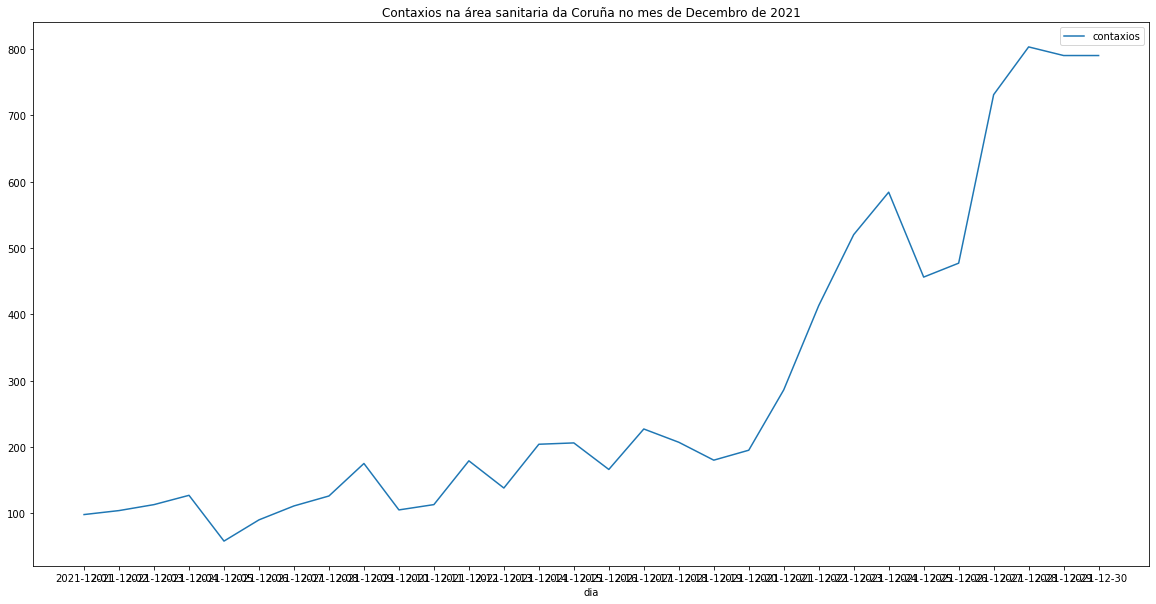

In [46]:
plt.figure(figsize=(20,10))
plt.title('Contaxios na área sanitaria da Coruña no mes de Decembro de 2021')
sns.lineplot(data=df_contaxios)